In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install tensorflow-gpu

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [69]:
import tensorflow as tf
import os

In [70]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [71]:
len(gpus)

1

In [72]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [73]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [74]:
data_dir = 'data'

In [75]:
image_exts = ['jpeg','jpg','bmp','png']

In [76]:
image_exts[1]

'jpg'

In [77]:
img = cv2.imread(os.path.join('data','Knife','_107992198_gettyimages-157815283.jpg'))

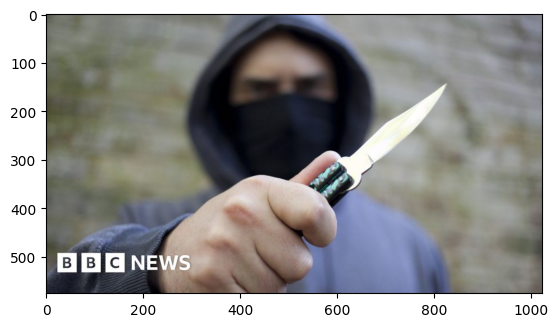

In [78]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [79]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remover(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))

Image not in ext listdata\Knife\40efc71a006f0b7421b6faa754e8a7780555c5a4-1440x1440.jpg
Issue with imagedata\Knife\40efc71a006f0b7421b6faa754e8a7780555c5a4-1440x1440.jpg
Image not in ext listdata\Knife\70f72865e0742a80209e41b1c9b637c756.2x.rsquare.w600.jpg
Issue with imagedata\Knife\70f72865e0742a80209e41b1c9b637c756.2x.rsquare.w600.jpg
Image not in ext listdata\Knife\butterfly-knives.jpg
Issue with imagedata\Knife\butterfly-knives.jpg
Image not in ext listdata\Knife\chef-knives.jpg
Issue with imagedata\Knife\chef-knives.jpg
Image not in ext listdata\Knife\IMG_1089.JPG.jpg
Issue with imagedata\Knife\IMG_1089.JPG.jpg
Image not in ext listdata\Knife\kitchen-knives.jpg
Issue with imagedata\Knife\kitchen-knives.jpg
Image not in ext listdata\Knife\Knife_Guide_22679_preview-1024x683.jpg
Issue with imagedata\Knife\Knife_Guide_22679_preview-1024x683.jpg
Image not in ext listdata\Knife\knives.jpg
Issue with imagedata\Knife\knives.jpg


In [80]:
import numpy as np
from matplotlib import pyplot as plt

In [81]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 703 files belonging to 2 classes.


In [82]:
data_iterator = data.as_numpy_iterator()

In [83]:
data_iterator

In [84]:
batch = data_iterator.next()

In [85]:
len(batch)

2

In [86]:
batch[1]

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0])

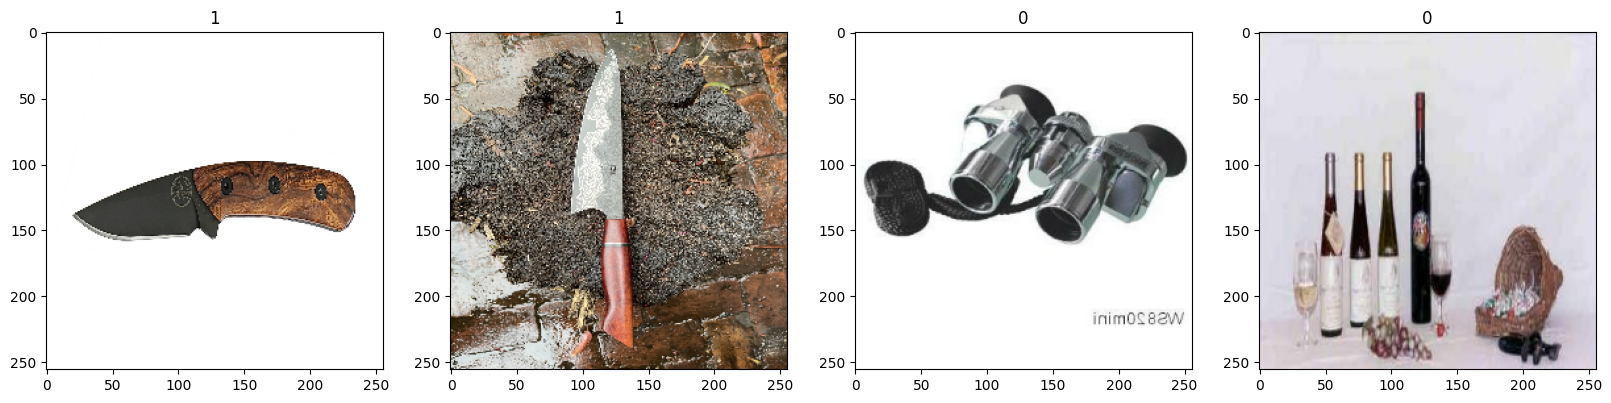

In [87]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [88]:
scaled = batch [0] / 255

In [89]:
scaled.max()

1.0

In [90]:
data = data.map(lambda x,y: (x/255, y))

In [91]:
scaled_iterator = data.as_numpy_iterator()

In [92]:
batch = scaled_iterator.next()

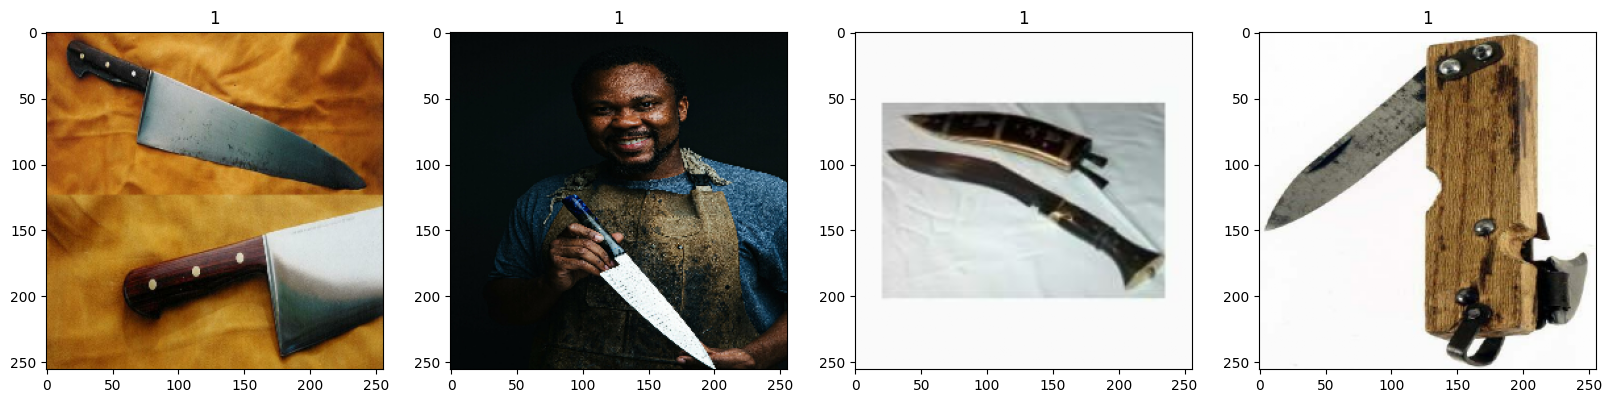

In [93]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [94]:
batch[0].max()

1.0

In [95]:
len(data)

22

In [96]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [97]:
train_size+val_size+test_size

22

In [98]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [100]:
model = Sequential()

In [101]:
model.add(Conv2D(16,(3,3),1,activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [102]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [104]:
logdir='logs'

In [105]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [106]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
15/15 [==============================] - 4s 158ms/step - loss: 0.8121 - accuracy: 0.4896 - val_loss: 0.6913 - val_accuracy: 0.5938
Epoch 2/20
15/15 [==============================] - 3s 162ms/step - loss: 0.6953 - accuracy: 0.5688 - val_loss: 0.6898 - val_accuracy: 0.5156
Epoch 3/20
15/15 [==============================] - 3s 160ms/step - loss: 0.6769 - accuracy: 0.6187 - val_loss: 0.6424 - val_accuracy: 0.7031
Epoch 4/20
15/15 [==============================] - 3s 158ms/step - loss: 0.6453 - accuracy: 0.6458 - val_loss: 0.5822 - val_accuracy: 0.7344
Epoch 5/20
15/15 [==============================] - 3s 159ms/step - loss: 0.5898 - accuracy: 0.7604 - val_loss: 0.5598 - val_accuracy: 0.6953
Epoch 6/20
15/15 [==============================] - 3s 158ms/step - loss: 0.4626 - accuracy: 0.8062 - val_loss: 0.3622 - val_accuracy: 0.8438
Epoch 7/20
15/15 [==============================] - 3s 160ms/step - loss: 0.3545 - accuracy: 0.8333 - val_loss: 0.3860 - val_accuracy: 0.8594
Epoch 

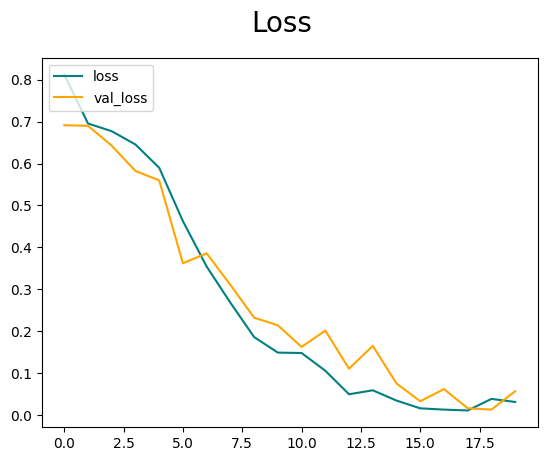

In [107]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

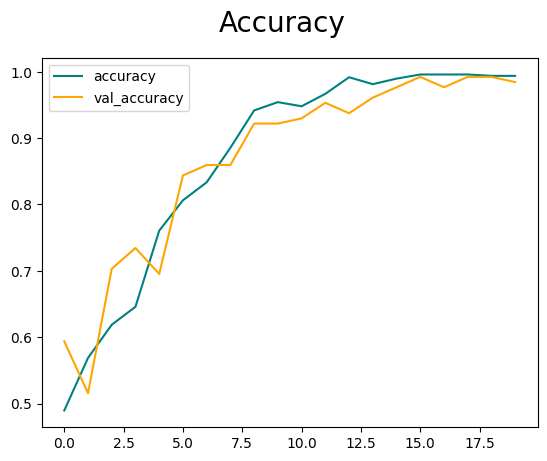

In [108]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [109]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [110]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [111]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 75ms/step


In [112]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:0.9818181991577148, Accuracy:0.9894737005233765


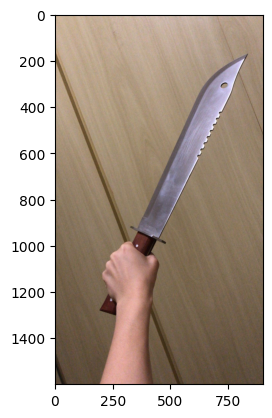

In [128]:
img = cv2.imread('knifetest4.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

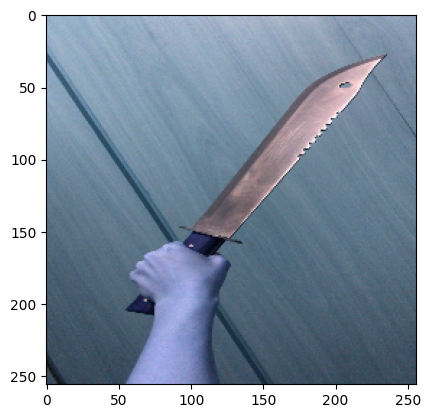

In [129]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [130]:
np.expand_dims(resize, 0)

array([[[[159.18994 , 180.4497  , 206.93018 ],
         [156.2207  , 179.19482 , 203.70776 ],
         [162.26294 , 184.92383 , 206.92383 ],
         ...,
         [139.40234 , 154.      , 183.      ],
         [143.47241 , 158.13452 , 185.69312 ],
         [138.83936 , 159.83936 , 181.83936 ]],

        [[154.86206 , 179.63159 , 203.63159 ],
         [151.91211 , 183.594   , 206.594   ],
         [145.82764 , 179.57764 , 202.57764 ],
         ...,
         [146.1897  , 158.47266 , 185.875   ],
         [143.72412 , 156.04834 , 182.50342 ],
         [140.21753 , 160.21753 , 178.21753 ]],

        [[155.521   , 173.4253  , 199.54053 ],
         [148.56982 , 174.656   , 200.71118 ],
         [149.94824 , 178.32617 , 203.63794 ],
         ...,
         [145.66528 , 158.78735 , 187.13794 ],
         [150.61548 , 158.63452 , 185.0586  ],
         [147.29224 , 163.43018 , 182.80518 ]],

        ...,

        [[ 49.21753 ,  75.30029 ,  91.05029 ],
         [ 56.58789 ,  73.056885,  89.9043  ]

In [131]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 21ms/step


In [132]:
yhat

array([[0.56376797]], dtype=float32)

In [133]:
if yhat > 0.5:
    print(f'Predicted class: knife')
else:
    print(f'Predicted class: generic')

Predicted class: knife
